In [33]:
from axi_stream_driver import NeuralNetworkOverlay
import numpy as np

X_test = np.load('x_test.npy')
X_test = X_test[:10]
# hello

nn = NeuralNetworkOverlay('design_1.bit', (10,196), (10, 10))

# bit file
# input shape (no of samples, input neurons)
# output shape (no of samples, output neurons)

y_hw, latency, throughput = nn.predict(X_test, profile=True)

print(y_hw)

print(np.argmax(y_hw))

[[ 0.          0.          0.          0.          0.01367188  0.
   0.          0.875       0.01367188  0.08203125]
 [ 0.03417969  0.03417969  0.734375    0.04589844  0.          0.04589844
   0.06835938  0.          0.03417969  0.        ]
 [ 0.          0.765625    0.03515625  0.04785156  0.01171875  0.01171875
   0.0234375   0.03515625  0.04785156  0.01171875]
 [ 0.765625    0.          0.01171875  0.03515625  0.01171875  0.03515625
   0.07128906  0.01171875  0.01171875  0.0234375 ]
 [ 0.02832031  0.          0.03808594  0.          0.609375    0.03808594
   0.05664062  0.05664062  0.01855469  0.1328125 ]
 [ 0.          0.875       0.01367188  0.02734375  0.          0.
   0.          0.02734375  0.02734375  0.01367188]
 [ 0.0078125   0.015625    0.          0.015625    0.5         0.0859375
   0.0234375   0.0859375   0.0625      0.1796875 ]
 [-0.03320312 -0.18261719 -0.04980469 -0.09960938 -0.81347656 -0.49804688
  -0.1328125  -0.18261719 -0.18261719 -1.0625    ]
 [-0.03710938 -0.

In [ ]:
import cv2
import numpy as np
from axi_stream_driver import NeuralNetworkOverlay
import os
import contextlib

# Initialize the neural network overlay for a single frame.
# The overlay is set up with input shape (1,196) and output shape (1,10)
nn = NeuralNetworkOverlay('design_1.bit', (1, 196), (1, 10))

# Open the video file (replace 'video.mp4' with your actual video file path)
cap = cv2.VideoCapture('output_video.mp4')

frame_index = 0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Preprocess the frame:
    # 1. Convert to grayscale (if your model expects grayscale input)
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # 2. Resize the frame so that its total number of pixels equals 196.
    #    For instance, resize to 14x14 pixels because 14*14=196.
#     plt.imshow(frame_gray)
    frame_resized = cv2.resize(frame_gray, (14, 14))
    
    # 3. Flatten the image and reshape it to form a batch of one sample (1,196)
    input_frame = frame_resized.flatten().reshape(1, -1)

    # Run prediction with profiling enabled, but suppress printed output.
    with open(os.devnull, 'w') as f, contextlib.redirect_stdout(f):
        y_hw, latency, throughput = nn.predict(input_frame, profile=True)
    
    # Now print the prediction and performance metrics for this frame.
    print(frame_index, np.argmax(y_hw))
    frame_index += 1

cap.release()


In [25]:
import cv2
import numpy as np
from axi_stream_driver import NeuralNetworkOverlay
import os
import contextlib

# Initialize the neural network overlay for a single frame.
# Expected input shape is (1,196) and output shape is (1,10)
nn = NeuralNetworkOverlay('design_1.bit', (1, 196), (1, 10))

# Open the video file (replace 'video.mp4' with your actual file)
cap = cv2.VideoCapture('output_video.mp4')
frame_index = 0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Preprocess the frame:
    # 1. Convert to grayscale (if needed by your model)
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # 2. Resize the frame to 14x14 so that the total number of pixels is 196.
    frame_resized = cv2.resize(frame_gray, (14, 14)).astype(np.float32) / 255.0
    
    # 3. Flatten the image and reshape to a batch of one sample (1,196)
    input_frame = frame_resized.flatten().reshape(1, -1)

    # Run prediction with profiling enabled but suppress printed output.
    with open(os.devnull, 'w') as f, contextlib.redirect_stdout(f):
        y_hw, latency, throughput = nn.predict(input_frame, profile=True)
    
    # If y_hw is returned as a list (e.g. [prediction_array]), get the first element.
    # Otherwise, use y_hw directly.
    prediction_array = y_hw[0] if isinstance(y_hw, list) else y_hw

    # Use np.argmax to get the index of the highest predicted value.
    predicted_class = np.argmax(prediction_array)
    
    # Print the prediction and performance metrics.
    print(f"Frame {frame_index}: Predicted: {predicted_class}")

    # Display the original frame.
#     cv2.imshow('Frame', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

    frame_index += 1

cap.release()
cv2.destroyAllWindows()


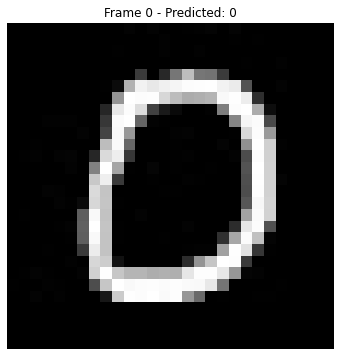

Frame 0: Predicted class: 0
Frame 0: Prediction values: [[0.75       0.         0.046875   0.05859375 0.01171875 0.0703125
  0.01171875 0.         0.0234375  0.01171875]]


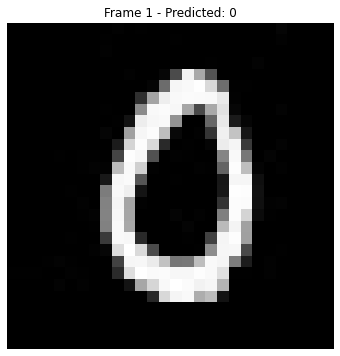

Frame 1: Predicted class: 0
Frame 1: Prediction values: [[0.6875     0.         0.03222656 0.04296875 0.01074219 0.06445312
  0.0859375  0.01074219 0.04296875 0.02148438]]


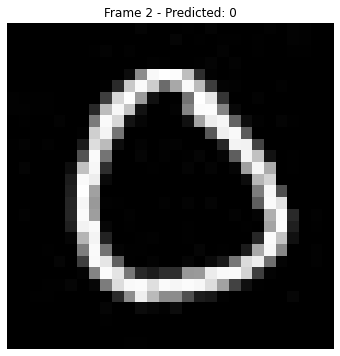

Frame 2: Predicted class: 0
Frame 2: Prediction values: [[0.578125   0.00878906 0.20703125 0.07226562 0.00878906 0.03613281
  0.00878906 0.01757812 0.03613281 0.00878906]]


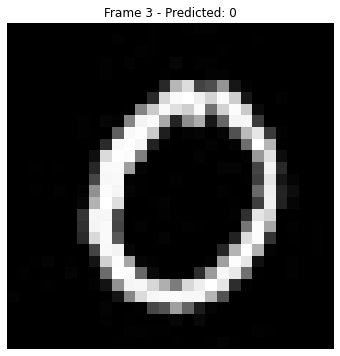

Frame 3: Predicted class: 0
Frame 3: Prediction values: [[0.8125     0.         0.01269531 0.02539062 0.01269531 0.07617188
  0.01269531 0.         0.02539062 0.01269531]]


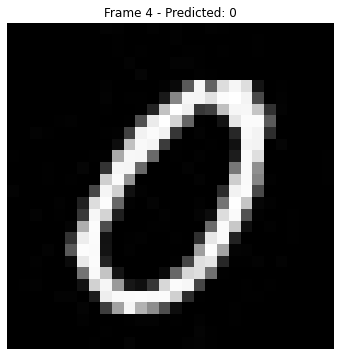

Frame 4: Predicted class: 0
Frame 4: Prediction values: [[0.6875     0.         0.01074219 0.06445312 0.02148438 0.11816406
  0.01074219 0.01074219 0.02148438 0.04296875]]


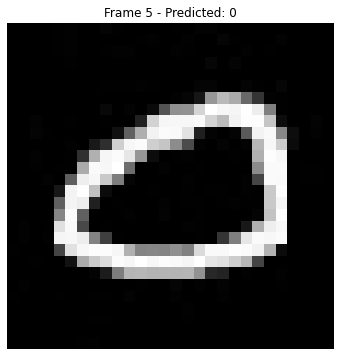

Frame 5: Predicted class: 0
Frame 5: Prediction values: [[0.875      0.         0.01367188 0.01367188 0.01367188 0.04101562
  0.01367188 0.         0.         0.01367188]]


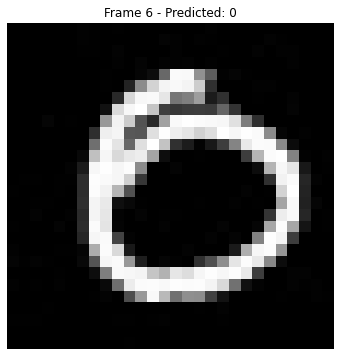

Frame 6: Predicted class: 0
Frame 6: Prediction values: [[0.828125   0.         0.05175781 0.01269531 0.         0.05175781
  0.01269531 0.         0.02539062 0.01269531]]


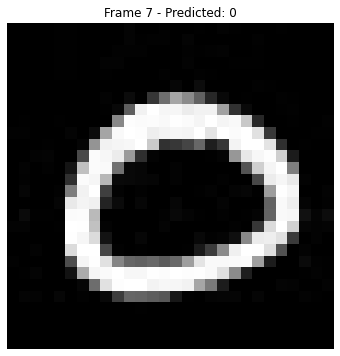

Frame 7: Predicted class: 0
Frame 7: Prediction values: [[0.90625    0.         0.02832031 0.01367188 0.         0.01367188
  0.         0.         0.01367188 0.01367188]]


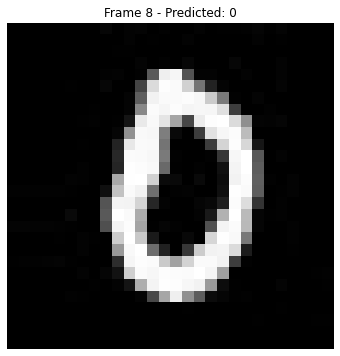

Frame 8: Predicted class: 0
Frame 8: Prediction values: [[0.671875   0.         0.03125    0.04199219 0.00976562 0.0625
  0.08398438 0.00976562 0.05175781 0.03125   ]]


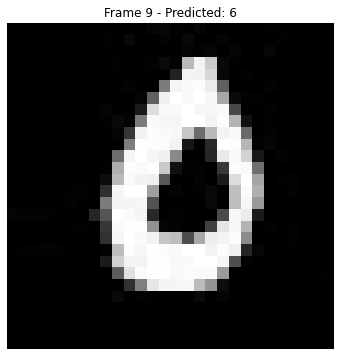

Frame 9: Predicted class: 6
Frame 9: Prediction values: [[0.18457031 0.0078125  0.04785156 0.03222656 0.0234375  0.06445312
  0.515625   0.03222656 0.04003906 0.0234375 ]]


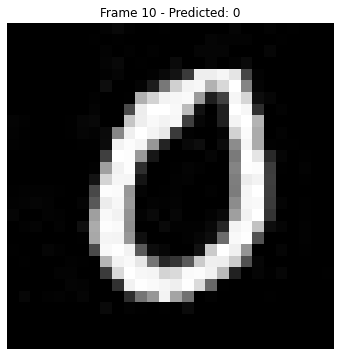

Frame 10: Predicted class: 0
Frame 10: Prediction values: [[0.8125     0.         0.02539062 0.01269531 0.01269531 0.05078125
  0.05078125 0.         0.01269531 0.01269531]]


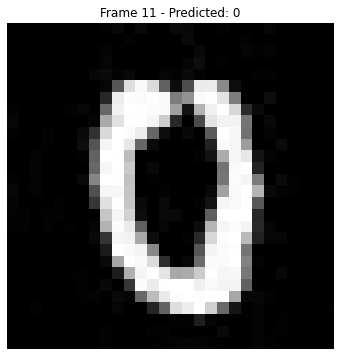

Frame 11: Predicted class: 0
Frame 11: Prediction values: [[0.625      0.         0.0390625  0.0390625  0.0390625  0.078125
  0.04882812 0.01953125 0.05859375 0.04882812]]


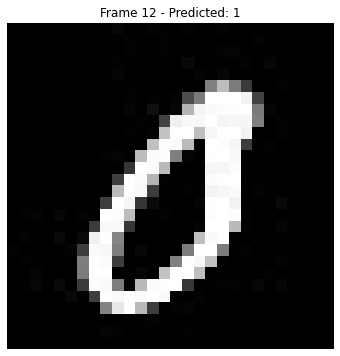

Frame 12: Predicted class: 1
Frame 12: Prediction values: [[-0.671875   -0.01074219 -0.06347656 -0.39941406 -0.06347656 -0.14746094
  -0.03222656 -0.11621094 -0.05273438 -0.11621094]]


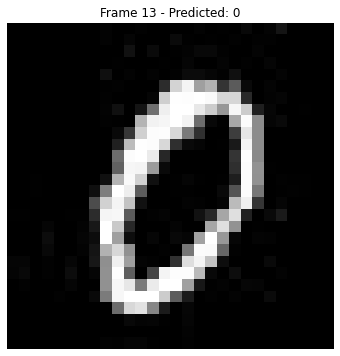

Frame 13: Predicted class: 0
Frame 13: Prediction values: [[0.71875    0.         0.01074219 0.04492188 0.01074219 0.08984375
  0.03320312 0.01074219 0.04492188 0.02246094]]


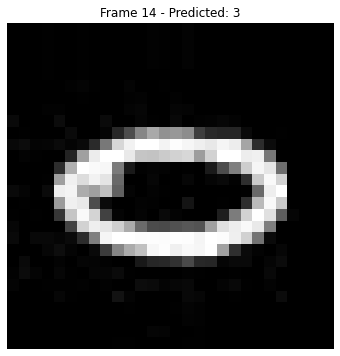

Frame 14: Predicted class: 3
Frame 14: Prediction values: [[-1.0302734  -0.10839844 -0.10839844 -0.02734375 -1.734375   -0.21679688
  -1.328125   -0.48828125 -0.08203125 -0.81347656]]


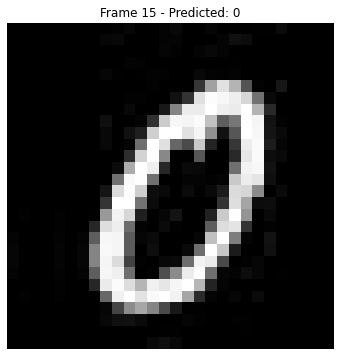

Frame 15: Predicted class: 0
Frame 15: Prediction values: [[0.6875     0.         0.01074219 0.05371094 0.01074219 0.11816406
  0.02148438 0.01074219 0.04296875 0.03222656]]


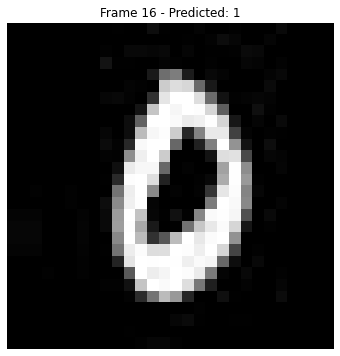

Frame 16: Predicted class: 1
Frame 16: Prediction values: [[-0.30078125 -0.01074219 -0.08007812 -0.06054688 -0.06054688 -0.11035156
  -0.640625   -0.11035156 -0.06054688 -0.11035156]]


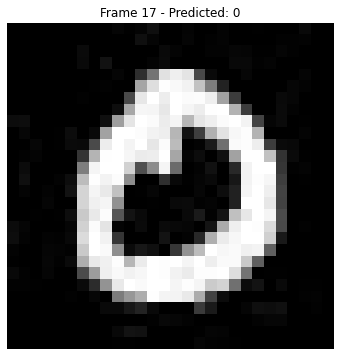

Frame 17: Predicted class: 0
Frame 17: Prediction values: [[0.875      0.         0.01367188 0.02734375 0.         0.04101562
  0.01367188 0.         0.01367188 0.01367188]]


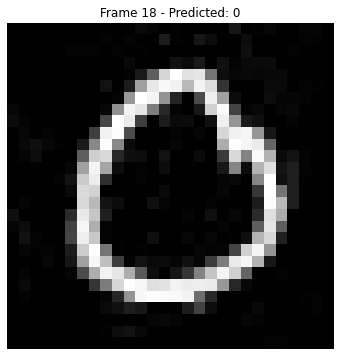

Frame 18: Predicted class: 0
Frame 18: Prediction values: [[0.71875    0.         0.08984375 0.05566406 0.01074219 0.04492188
  0.01074219 0.01074219 0.04492188 0.01074219]]


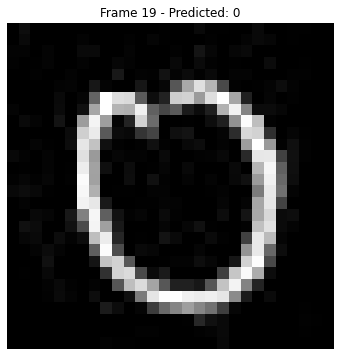

Frame 19: Predicted class: 0
Frame 19: Prediction values: [[0.65625    0.00976562 0.08203125 0.05078125 0.03027344 0.06152344
  0.00976562 0.02050781 0.05078125 0.02050781]]


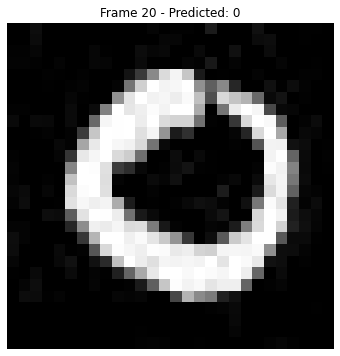

Frame 20: Predicted class: 0
Frame 20: Prediction values: [[0.625      0.00976562 0.10742188 0.02929688 0.00976562 0.078125
  0.05859375 0.00976562 0.04882812 0.00976562]]


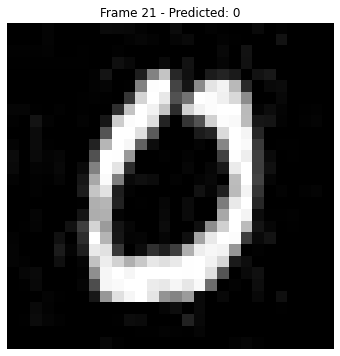

Frame 21: Predicted class: 0
Frame 21: Prediction values: [[0.8125     0.         0.03808594 0.05078125 0.         0.05078125
  0.01269531 0.         0.01269531 0.01269531]]


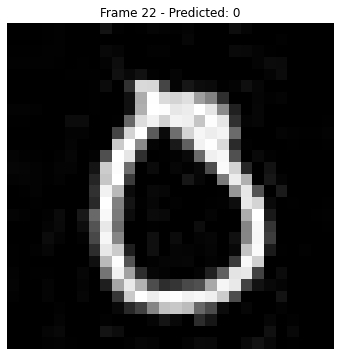

Frame 22: Predicted class: 0
Frame 22: Prediction values: [[0.671875   0.         0.02050781 0.0625     0.00976562 0.0625
  0.         0.04199219 0.05175781 0.0625    ]]


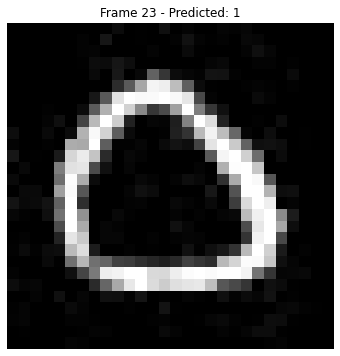

Frame 23: Predicted class: 1
Frame 23: Prediction values: [[-0.53125    -0.00878906 -0.24902344 -0.14941406 -0.00878906 -0.03320312
  -0.03320312 -0.04980469 -0.02539062 -0.02539062]]


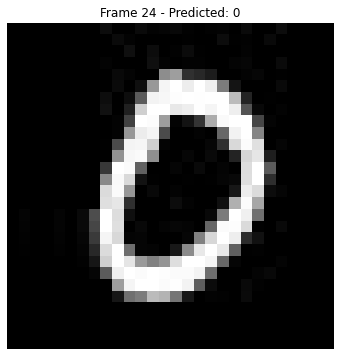

Frame 24: Predicted class: 0
Frame 24: Prediction values: [[0.890625   0.         0.01367188 0.01367188 0.         0.02734375
  0.01367188 0.         0.01367188 0.01367188]]


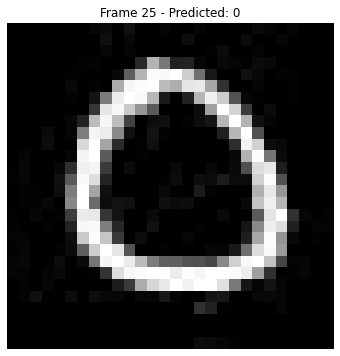

Frame 25: Predicted class: 0
Frame 25: Prediction values: [[0.5       0.0078125 0.296875  0.046875  0.0078125 0.046875  0.03125
  0.015625  0.03125   0.0078125]]


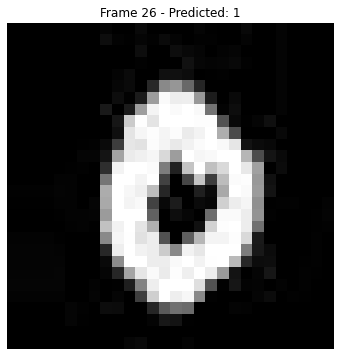

Frame 26: Predicted class: 1
Frame 26: Prediction values: [[-0.45507812 -0.01269531 -0.04785156 -0.09570312 -0.13183594 -0.13183594
  -0.765625   -0.16796875 -0.07226562 -0.16796875]]


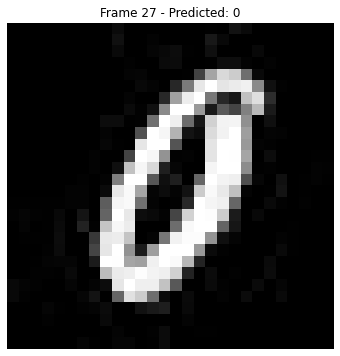

Frame 27: Predicted class: 0
Frame 27: Prediction values: [[1.765625   0.08203125 1.0478516  0.11035156 1.3515625  0.49609375
  1.3515625  0.82714844 0.3857422  0.63378906]]


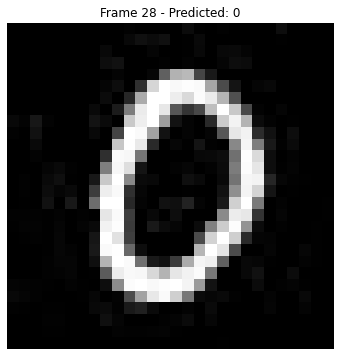

Frame 28: Predicted class: 0
Frame 28: Prediction values: [[0.875      0.         0.02734375 0.01367188 0.         0.02734375
  0.02734375 0.         0.01367188 0.01367188]]


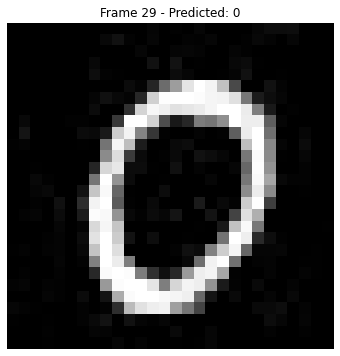

Frame 29: Predicted class: 0
Frame 29: Prediction values: [[0.796875   0.         0.02441406 0.03710938 0.         0.06152344
  0.01171875 0.         0.03710938 0.01171875]]


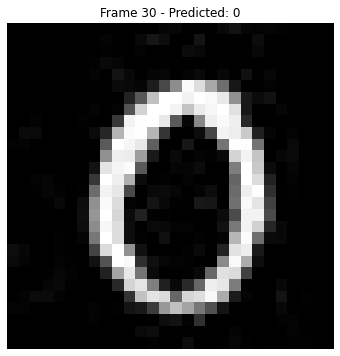

Frame 30: Predicted class: 0
Frame 30: Prediction values: [[0.84375    0.         0.01269531 0.01269531 0.01269531 0.05273438
  0.01269531 0.         0.02636719 0.01269531]]


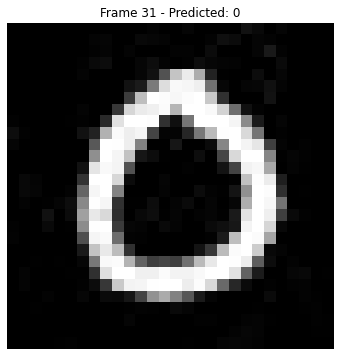

Frame 31: Predicted class: 0
Frame 31: Prediction values: [[0.9375     0.         0.01464844 0.01464844 0.         0.01464844
  0.         0.         0.01464844 0.        ]]


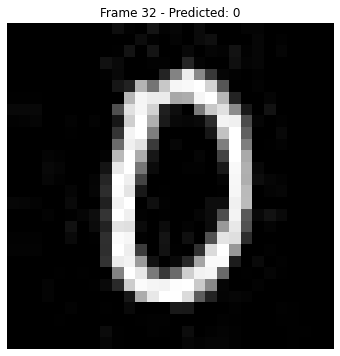

Frame 32: Predicted class: 0
Frame 32: Prediction values: [[0.671875   0.         0.05175781 0.05175781 0.00976562 0.08398438
  0.05175781 0.00976562 0.05175781 0.00976562]]


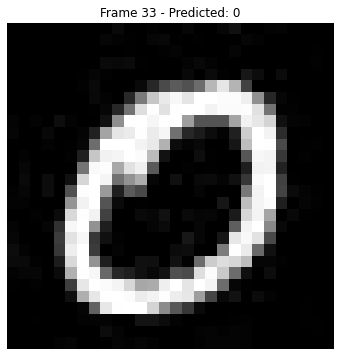

Frame 33: Predicted class: 0
Frame 33: Prediction values: [[0.75       0.         0.01171875 0.046875   0.01171875 0.09375
  0.         0.         0.03515625 0.03515625]]


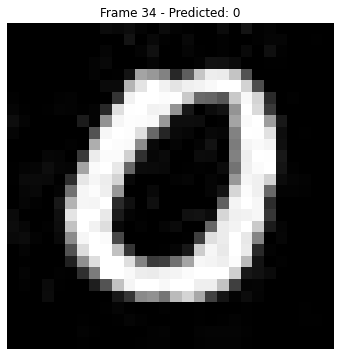

Frame 34: Predicted class: 0
Frame 34: Prediction values: [[0.890625   0.         0.02734375 0.01367188 0.         0.02734375
  0.01367188 0.         0.01367188 0.        ]]


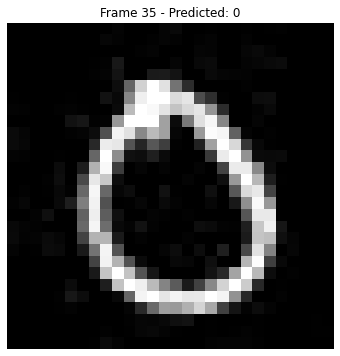

Frame 35: Predicted class: 0
Frame 35: Prediction values: [[0.6875     0.         0.04296875 0.05371094 0.01074219 0.05371094
  0.         0.03222656 0.06445312 0.04296875]]


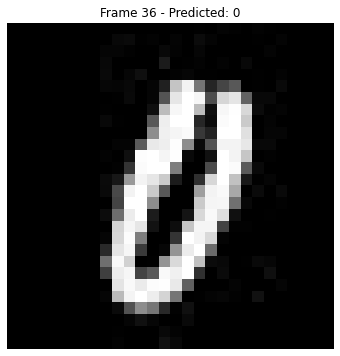

Frame 36: Predicted class: 0
Frame 36: Prediction values: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


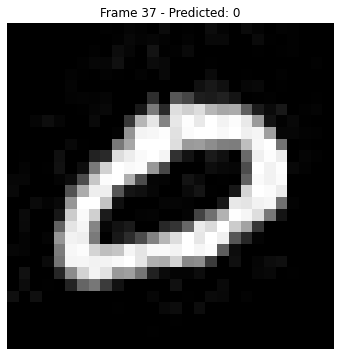

Frame 37: Predicted class: 0
Frame 37: Prediction values: [[0.84375    0.         0.02636719 0.01269531 0.01269531 0.05273438
  0.01269531 0.01269531 0.         0.01269531]]


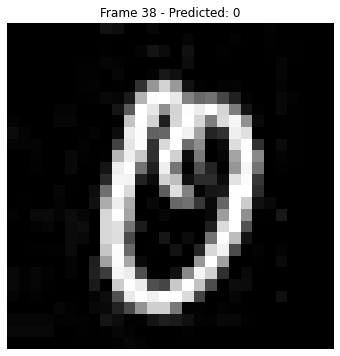

Frame 38: Predicted class: 0
Frame 38: Prediction values: [[0.578125   0.00878906 0.01757812 0.12597656 0.00878906 0.09863281
  0.01757812 0.01757812 0.05371094 0.04492188]]


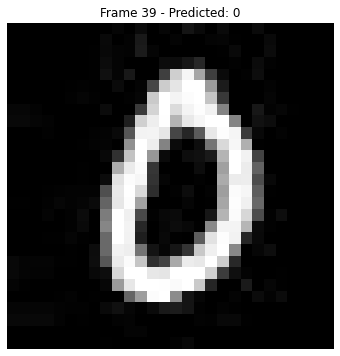

Frame 39: Predicted class: 0
Frame 39: Prediction values: [[0.734375   0.         0.03417969 0.03417969 0.01074219 0.05664062
  0.06835938 0.01074219 0.03417969 0.01074219]]


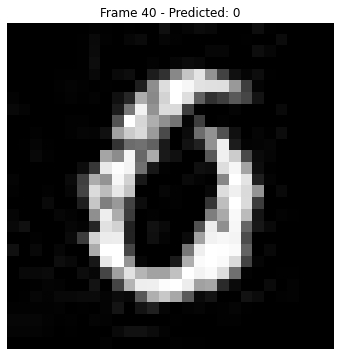

Frame 40: Predicted class: 0
Frame 40: Prediction values: [[0.609375   0.         0.046875   0.046875   0.03808594 0.07617188
  0.10449219 0.00878906 0.01855469 0.02832031]]


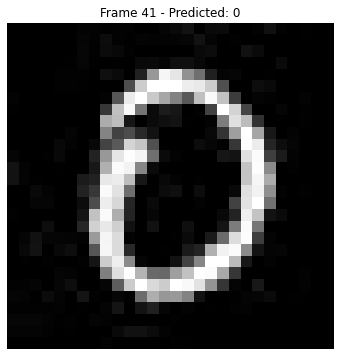

Frame 41: Predicted class: 0
Frame 41: Prediction values: [[0.8125     0.         0.02539062 0.02539062 0.01269531 0.05078125
  0.03808594 0.         0.01269531 0.01269531]]


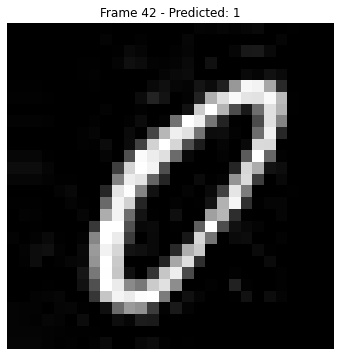

Frame 42: Predicted class: 1
Frame 42: Prediction values: [[-0.71875    -0.03417969 -0.05664062 -0.08984375 -0.12402344 -0.55078125
  -0.08984375 -0.04492188 -0.08984375 -0.06738281]]


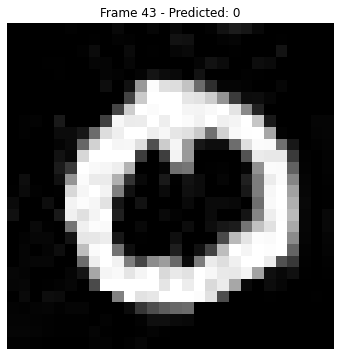

Frame 43: Predicted class: 0
Frame 43: Prediction values: [[0.921875   0.         0.01367188 0.01367188 0.         0.01367188
  0.         0.         0.01367188 0.01367188]]


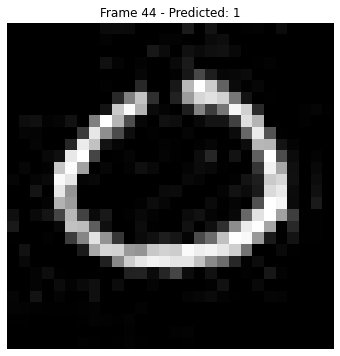

Frame 44: Predicted class: 1
Frame 44: Prediction values: [[-0.53125    -0.02539062 -0.14941406 -0.09179688 -0.02539062 -0.06640625
  -0.11621094 -0.04199219 -0.02539062 -0.02539062]]


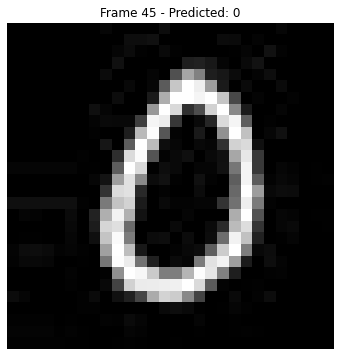

Frame 45: Predicted class: 0
Frame 45: Prediction values: [[0.734375   0.         0.03417969 0.03417969 0.01074219 0.06835938
  0.05664062 0.         0.03417969 0.01074219]]


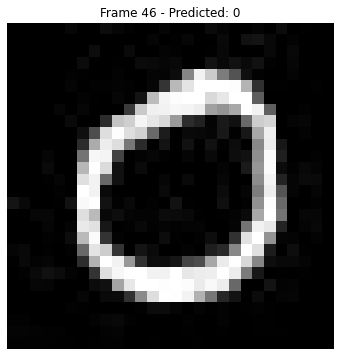

Frame 46: Predicted class: 0
Frame 46: Prediction values: [[0.671875   0.         0.05175781 0.03125    0.00976562 0.11523438
  0.03125    0.         0.0625     0.00976562]]


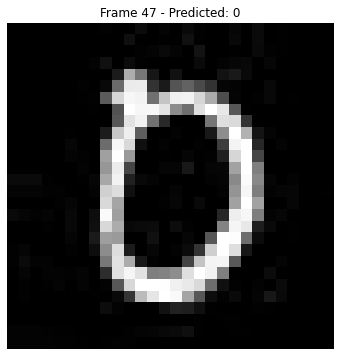

Frame 47: Predicted class: 0
Frame 47: Prediction values: [[0.75       0.         0.046875   0.05859375 0.01171875 0.05859375
  0.0234375  0.         0.0234375  0.01171875]]


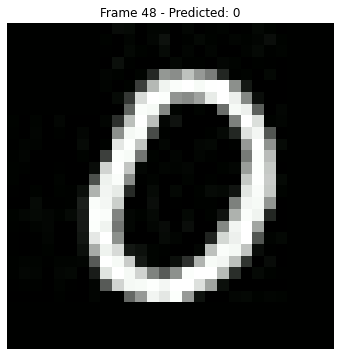

Frame 48: Predicted class: 0
Frame 48: Prediction values: [[0.84375    0.         0.02636719 0.02636719 0.01269531 0.05273438
  0.01269531 0.         0.01269531 0.        ]]


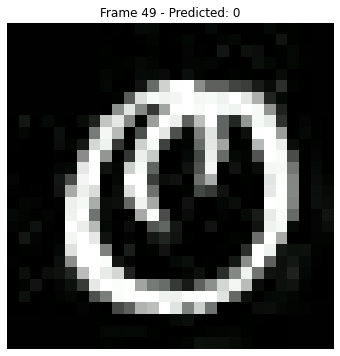

Frame 49: Predicted class: 0
Frame 49: Prediction values: [[0.578125   0.         0.03613281 0.05371094 0.00878906 0.16210938
  0.         0.00878906 0.09863281 0.03613281]]


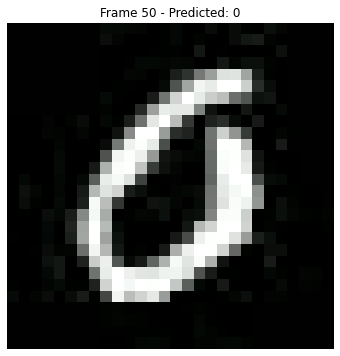

Frame 50: Predicted class: 0
Frame 50: Prediction values: [[0.734375   0.         0.01074219 0.03417969 0.04589844 0.05664062
  0.05664062 0.01074219 0.01074219 0.03417969]]


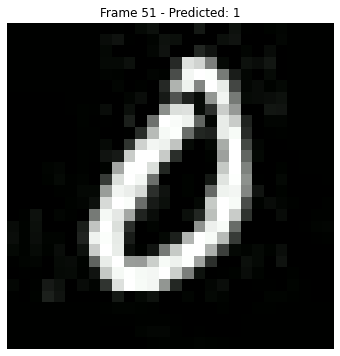

Frame 51: Predicted class: 1
Frame 51: Prediction values: [[-0.734375   -0.01171875 -0.16113281 -0.04589844 -0.20703125 -0.16113281
  -0.43652344 -0.05761719 -0.03515625 -0.06933594]]


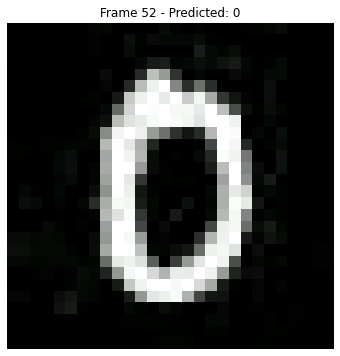

Frame 52: Predicted class: 0
Frame 52: Prediction values: [[0.71875    0.         0.04492188 0.03320312 0.01074219 0.05566406
  0.05566406 0.01074219 0.03320312 0.03320312]]


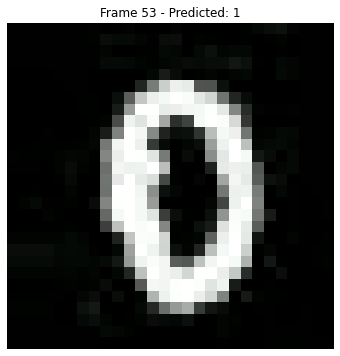

Frame 53: Predicted class: 1
Frame 53: Prediction values: [[-0.75        0.         -0.05859375 -0.0703125  -0.12890625 -0.26953125
  -0.26953125 -0.05859375 -0.2109375  -0.1640625 ]]


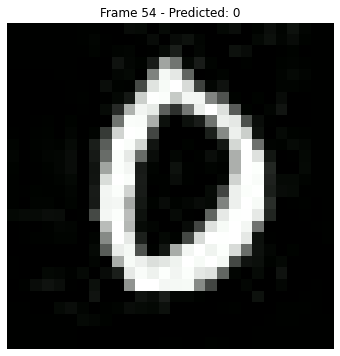

Frame 54: Predicted class: 0
Frame 54: Prediction values: [[0.75       0.         0.0234375  0.01171875 0.0234375  0.046875
  0.09375    0.01171875 0.0234375  0.01171875]]


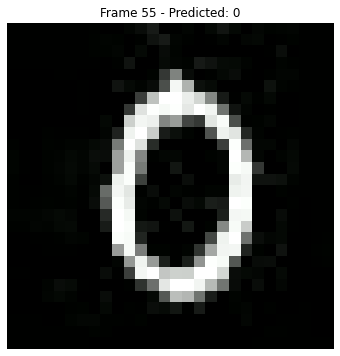

Frame 55: Predicted class: 0
Frame 55: Prediction values: [[0.625      0.         0.0390625  0.0390625  0.01953125 0.078125
  0.078125   0.00976562 0.04882812 0.0390625 ]]


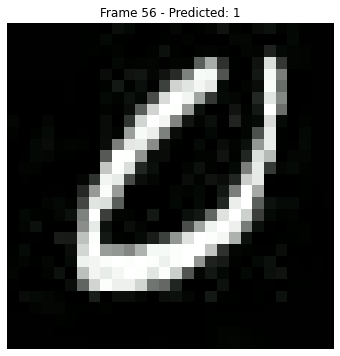

Frame 56: Predicted class: 1
Frame 56: Prediction values: [[-0.90625    -0.02832031 -0.4248047  -0.07128906 -0.07128906 -0.53808594
  -0.4248047  -0.02832031 -0.07128906 -0.05664062]]


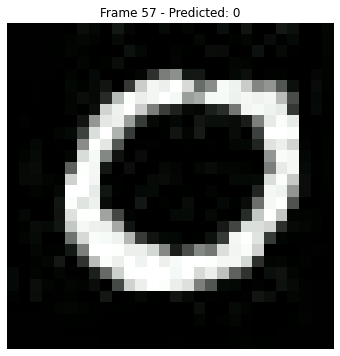

Frame 57: Predicted class: 0
Frame 57: Prediction values: [[0.578125   0.00878906 0.09863281 0.03613281 0.00878906 0.12597656
  0.07226562 0.         0.04492188 0.00878906]]


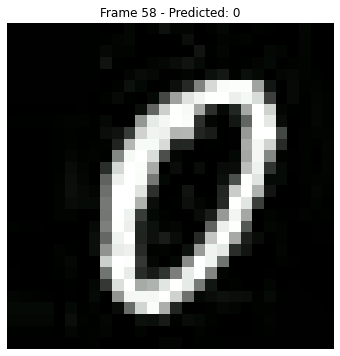

Frame 58: Predicted class: 0
Frame 58: Prediction values: [[0.53125    0.         0.02441406 0.04101562 0.02441406 0.19042969
  0.06640625 0.0078125  0.06640625 0.03320312]]


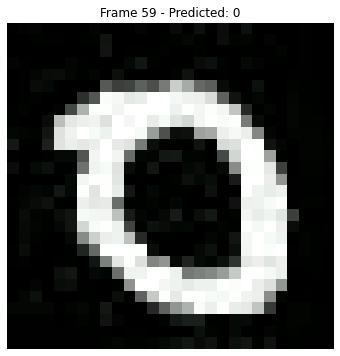

Frame 59: Predicted class: 0
Frame 59: Prediction values: [[0.875      0.         0.0546875  0.01367188 0.         0.01367188
  0.         0.         0.01367188 0.01367188]]


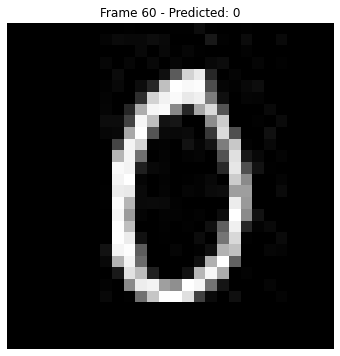

Frame 60: Predicted class: 0
Frame 60: Prediction values: [[0.5       0.0078125 0.0625    0.0625    0.0234375 0.109375  0.0625
  0.0078125 0.109375  0.0390625]]


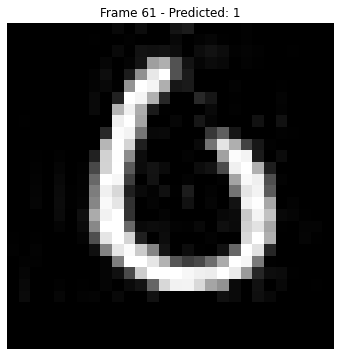

Frame 61: Predicted class: 1
Frame 61: Prediction values: [[-0.546875   -0.00878906 -0.06835938 -0.02636719 -0.09472656 -0.06835938
  -0.25683594 -0.02636719 -0.02636719 -0.04296875]]


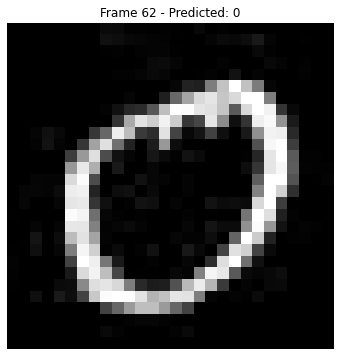

Frame 62: Predicted class: 0
Frame 62: Prediction values: [[0.71875    0.         0.03320312 0.05566406 0.01074219 0.08984375
  0.         0.01074219 0.04492188 0.03320312]]


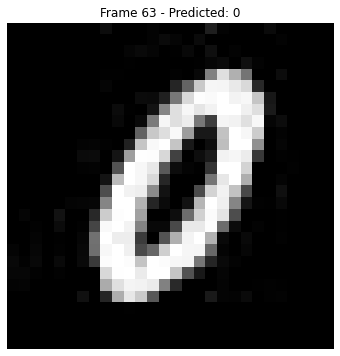

Frame 63: Predicted class: 0
Frame 63: Prediction values: [[0.5625     0.         0.0703125  0.00878906 0.05273438 0.0703125
  0.09667969 0.03515625 0.04394531 0.03515625]]


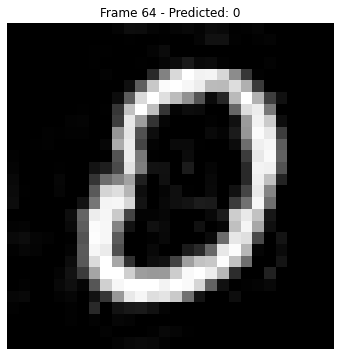

Frame 64: Predicted class: 0
Frame 64: Prediction values: [[0.71875    0.         0.05566406 0.04492188 0.01074219 0.08984375
  0.04492188 0.         0.02246094 0.01074219]]


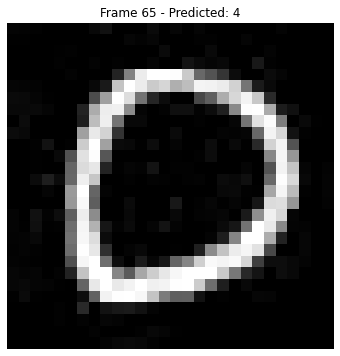

Frame 65: Predicted class: 4
Frame 65: Prediction values: [[-0.515625   -0.01660156 -0.14550781 -0.18554688 -0.00878906 -0.08886719
  -0.04882812 -0.00878906 -0.03222656 -0.00878906]]


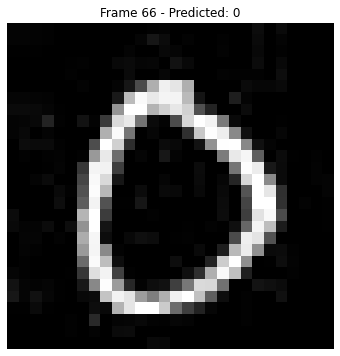

Frame 66: Predicted class: 0
Frame 66: Prediction values: [[0.625      0.00976562 0.04882812 0.13671875 0.         0.04882812
  0.00976562 0.02929688 0.04882812 0.0390625 ]]


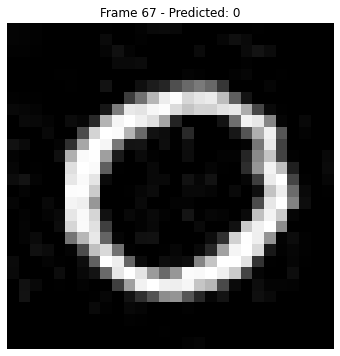

Frame 67: Predicted class: 0
Frame 67: Prediction values: [[0.84375    0.         0.0390625  0.02636719 0.         0.0390625
  0.01269531 0.         0.01269531 0.01269531]]


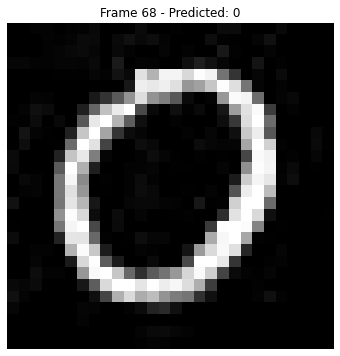

Frame 68: Predicted class: 0
Frame 68: Prediction values: [[0.5625     0.00878906 0.12304688 0.15820312 0.00878906 0.04394531
  0.03515625 0.01757812 0.01757812 0.00878906]]


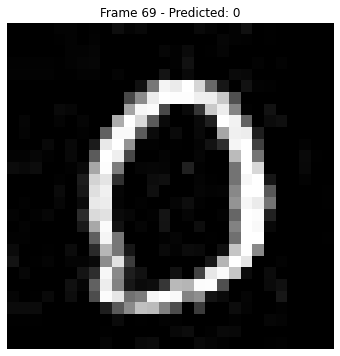

Frame 69: Predicted class: 0
Frame 69: Prediction values: [[0.71875    0.         0.04492188 0.05566406 0.01074219 0.05566406
  0.01074219 0.01074219 0.04492188 0.03320312]]


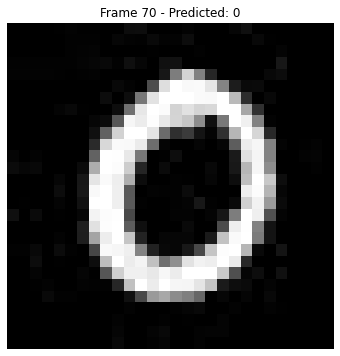

Frame 70: Predicted class: 0
Frame 70: Prediction values: [[0.890625   0.         0.01367188 0.01367188 0.         0.04101562
  0.01367188 0.         0.01367188 0.        ]]


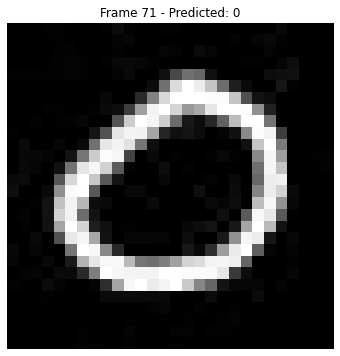

Frame 71: Predicted class: 0
Frame 71: Prediction values: [[0.875      0.         0.02734375 0.01367188 0.         0.04101562
  0.01367188 0.         0.01367188 0.01367188]]


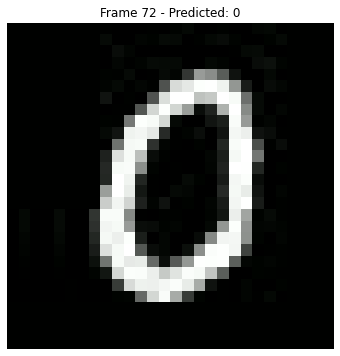

Frame 72: Predicted class: 0
Frame 72: Prediction values: [[0.765625   0.         0.0234375  0.0234375  0.01171875 0.05957031
  0.05957031 0.         0.0234375  0.01171875]]


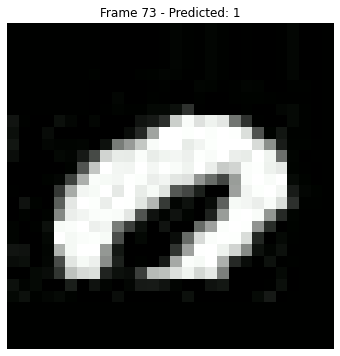

Frame 73: Predicted class: 1
Frame 73: Prediction values: [[-0.53125    -0.00878906 -0.00878906 -0.04199219 -0.19140625 -0.06640625
  -0.11621094 -0.03320312 -0.00878906 -0.11621094]]


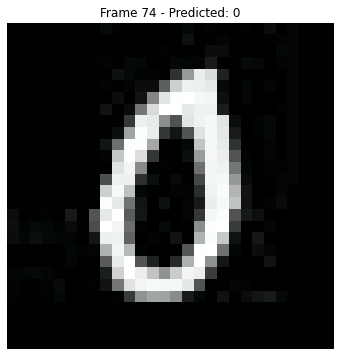

Frame 74: Predicted class: 0
Frame 74: Prediction values: [[0.546875   0.         0.06835938 0.05078125 0.04199219 0.06835938
  0.05078125 0.05078125 0.03417969 0.06835938]]


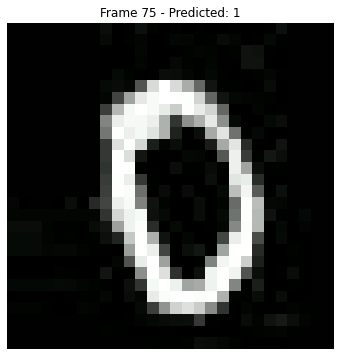

Frame 75: Predicted class: 1
Frame 75: Prediction values: [[-0.765625   -0.01269531 -0.13183594 -0.09570312 -0.06054688 -0.27539062
  -0.16796875 -0.06054688 -0.359375   -0.13183594]]


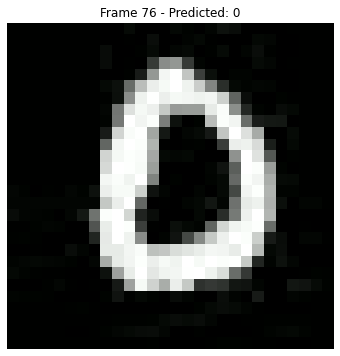

Frame 76: Predicted class: 0
Frame 76: Prediction values: [[0.71875    0.         0.03320312 0.02246094 0.01074219 0.05566406
  0.08984375 0.01074219 0.03320312 0.01074219]]


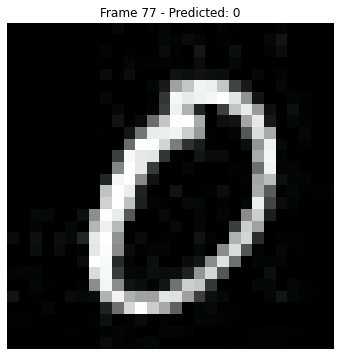

Frame 77: Predicted class: 0
Frame 77: Prediction values: [[0.71875    0.         0.02246094 0.04492188 0.01074219 0.12304688
  0.02246094 0.         0.03320312 0.02246094]]


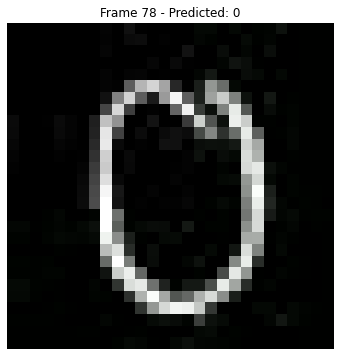

Frame 78: Predicted class: 0
Frame 78: Prediction values: [[0.578125   0.00878906 0.05371094 0.07226562 0.02636719 0.07226562
  0.02636719 0.03613281 0.07226562 0.03613281]]


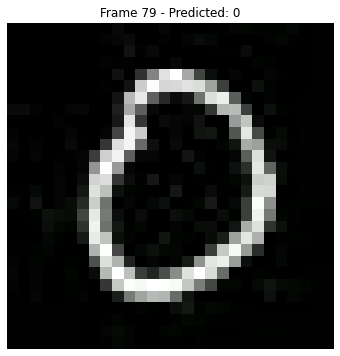

Frame 79: Predicted class: 0
Frame 79: Prediction values: [[0.765625   0.         0.04785156 0.03515625 0.01171875 0.05957031
  0.03515625 0.         0.01171875 0.01171875]]


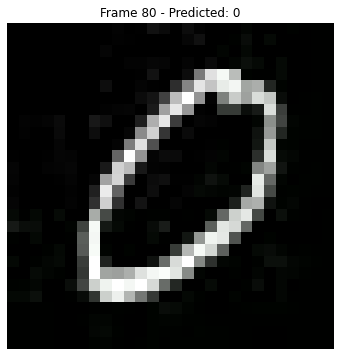

Frame 80: Predicted class: 0
Frame 80: Prediction values: [[0.515625   0.015625   0.08789062 0.06445312 0.03222656 0.14453125
  0.06445312 0.0078125  0.03222656 0.03222656]]


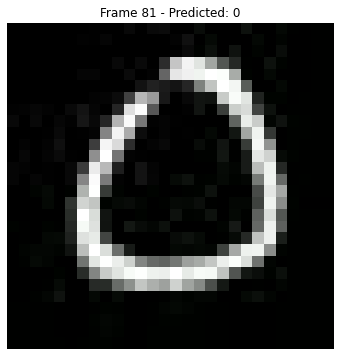

Frame 81: Predicted class: 0
Frame 81: Prediction values: [[0.515625   0.015625   0.14453125 0.03222656 0.0234375  0.11230469
  0.08789062 0.0078125  0.03222656 0.0078125 ]]


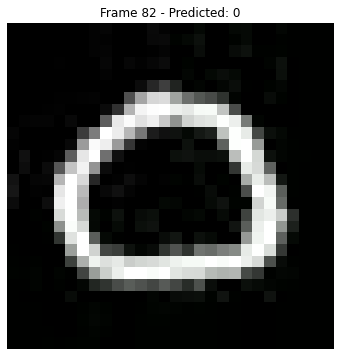

Frame 82: Predicted class: 0
Frame 82: Prediction values: [[0.765625   0.         0.09570312 0.04785156 0.         0.0234375
  0.01171875 0.0234375  0.01171875 0.01171875]]


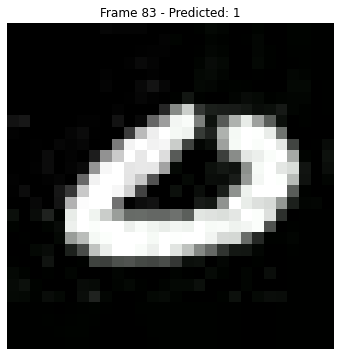

Frame 83: Predicted class: 1
Frame 83: Prediction values: [[-0.546875   -0.00878906 -0.02636719 -0.00878906 -0.19726562 -0.04296875
  -0.19726562 -0.04296875 -0.01757812 -0.09472656]]


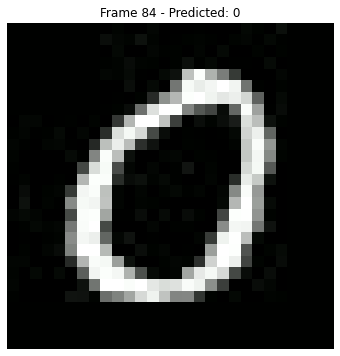

Frame 84: Predicted class: 0
Frame 84: Prediction values: [[0.8125     0.         0.03808594 0.03808594 0.         0.06347656
  0.01269531 0.         0.01269531 0.01269531]]


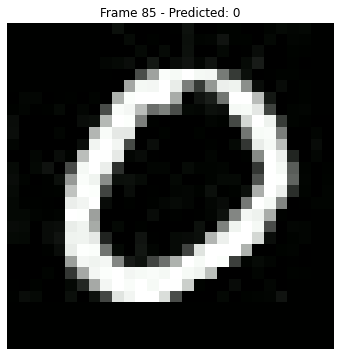

Frame 85: Predicted class: 0
Frame 85: Prediction values: [[0.796875   0.         0.04980469 0.04980469 0.         0.04980469
  0.02441406 0.         0.01171875 0.01171875]]


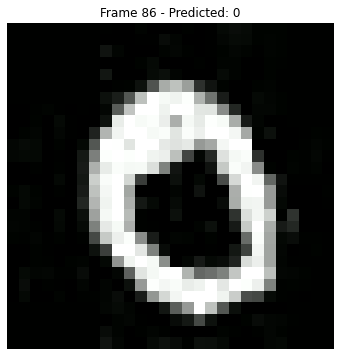

Frame 86: Predicted class: 0
Frame 86: Prediction values: [[0.71875    0.         0.01074219 0.01074219 0.03320312 0.06738281
  0.03320312 0.02246094 0.04492188 0.04492188]]


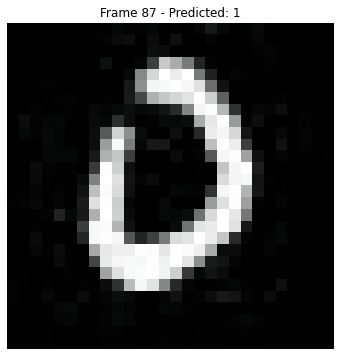

Frame 87: Predicted class: 1
Frame 87: Prediction values: [[-0.57421875 -0.03515625 -0.75       -0.05859375 -0.09375    -0.05859375
  -0.2109375  -0.09375    -0.046875   -0.0703125 ]]


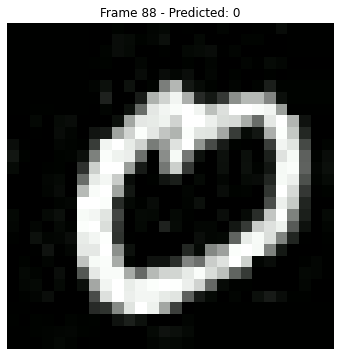

Frame 88: Predicted class: 0
Frame 88: Prediction values: [[0.75       0.         0.0234375  0.03515625 0.01171875 0.09375
  0.01171875 0.         0.03515625 0.0234375 ]]


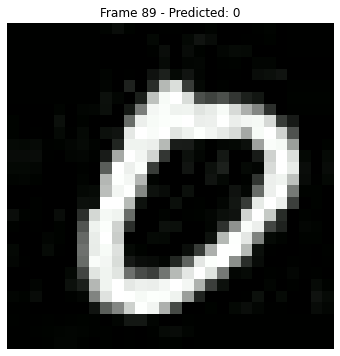

Frame 89: Predicted class: 0
Frame 89: Prediction values: [[0.828125   0.         0.01269531 0.03808594 0.         0.06445312
  0.01269531 0.         0.01269531 0.01269531]]


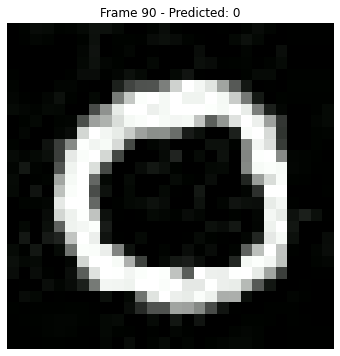

Frame 90: Predicted class: 0
Frame 90: Prediction values: [[0.75       0.         0.0703125  0.03515625 0.01171875 0.046875
  0.01171875 0.01171875 0.03515625 0.01171875]]


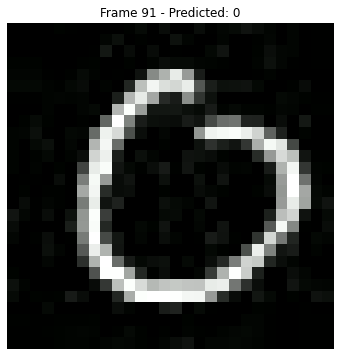

Frame 91: Predicted class: 0
Frame 91: Prediction values: [[0.625      0.00976562 0.13671875 0.05859375 0.01953125 0.05859375
  0.00976562 0.00976562 0.05859375 0.00976562]]


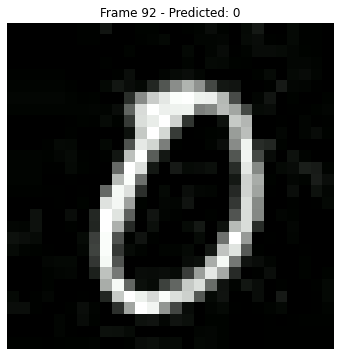

Frame 92: Predicted class: 0
Frame 92: Prediction values: [[0.640625   0.         0.02929688 0.05957031 0.00976562 0.109375
  0.02929688 0.00976562 0.05957031 0.04003906]]


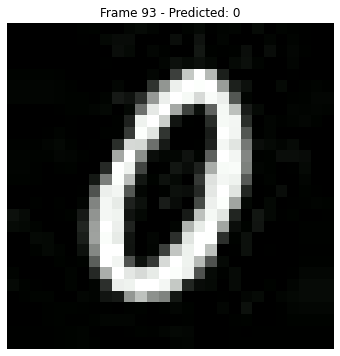

Frame 93: Predicted class: 0
Frame 93: Prediction values: [[0.578125   0.         0.09863281 0.03613281 0.05371094 0.04492188
  0.04492188 0.04492188 0.02636719 0.04492188]]


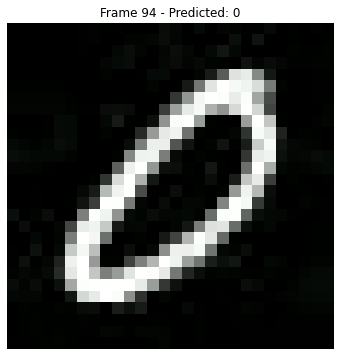

Frame 94: Predicted class: 0
Frame 94: Prediction values: [[0.734375   0.         0.03417969 0.05664062 0.02246094 0.09179688
  0.03417969 0.         0.         0.01074219]]


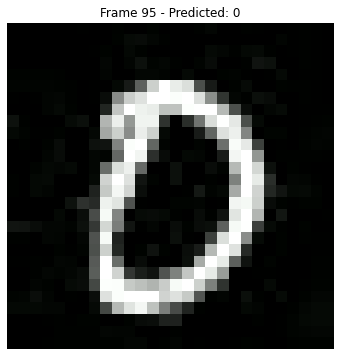

Frame 95: Predicted class: 0
Frame 95: Prediction values: [[0.6875     0.         0.03222656 0.0859375  0.01074219 0.06445312
  0.01074219 0.01074219 0.04296875 0.04296875]]


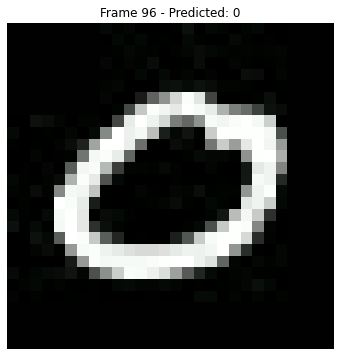

Frame 96: Predicted class: 0
Frame 96: Prediction values: [[0.890625   0.         0.04101562 0.01367188 0.         0.01367188
  0.01367188 0.         0.         0.01367188]]


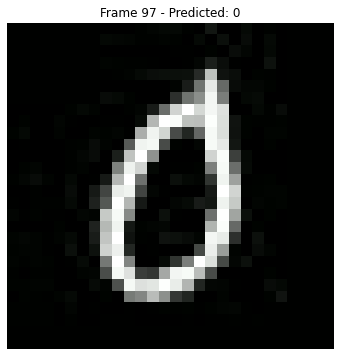

Frame 97: Predicted class: 0
Frame 97: Prediction values: [[0.546875   0.         0.04199219 0.05078125 0.05078125 0.09375
  0.05078125 0.05078125 0.02539062 0.06835938]]


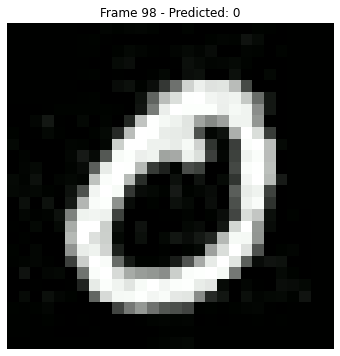

Frame 98: Predicted class: 0
Frame 98: Prediction values: [[0.875      0.         0.01367188 0.02734375 0.         0.04101562
  0.         0.         0.01367188 0.01367188]]


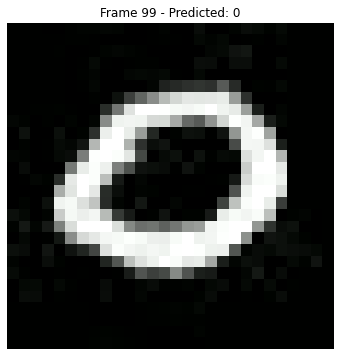

Frame 99: Predicted class: 0
Frame 99: Prediction values: [[0.796875   0.         0.03710938 0.01171875 0.02441406 0.01171875
  0.06152344 0.01171875 0.01171875 0.02441406]]


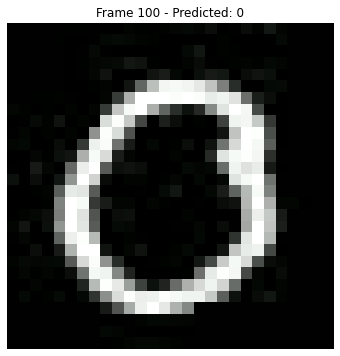

Frame 100: Predicted class: 0
Frame 100: Prediction values: [[0.6875     0.         0.06445312 0.11816406 0.01074219 0.04296875
  0.         0.01074219 0.04296875 0.02148438]]


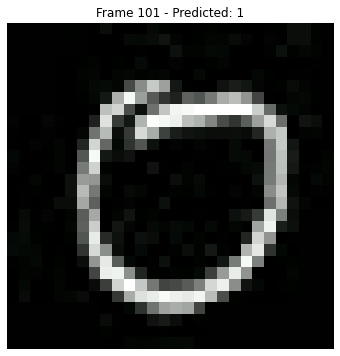

Frame 101: Predicted class: 1
Frame 101: Prediction values: [[-0.53125    -0.00878906 -0.06640625 -0.09179688 -0.02539062 -0.19140625
  -0.00878906 -0.03320312 -0.11621094 -0.04199219]]


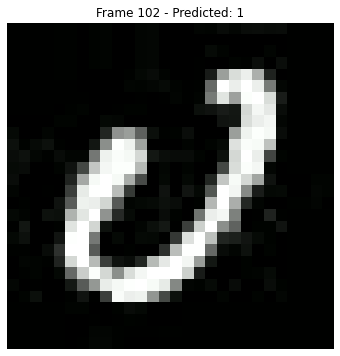

Frame 102: Predicted class: 1
Frame 102: Prediction values: [[-0.53125     0.         -0.01660156 -0.02539062 -0.24902344 -0.14941406
  -0.04199219 -0.03320312 -0.00878906 -0.04980469]]



KeyboardInterrupt



In [29]:
import cv2
import numpy as np
from axi_stream_driver import NeuralNetworkOverlay
import os
import contextlib
import matplotlib.pyplot as plt

# Initialize the neural network overlay for a single frame.
# Expected input shape is (1,196) and output shape is (1,10)
nn = NeuralNetworkOverlay('design_1.bit', (1, 196), (1, 10))

# Open the video file (replace 'output_video.mp4' with your actual file)
cap = cv2.VideoCapture('output_video.mp4')
frame_index = 0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Convert the frame to grayscale.
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Resize the frame to 14x14 so that the total number of pixels is 196,
    # then convert to float and normalize pixel values to be between 0 and 1.
    frame_resized = cv2.resize(frame_gray, (14, 14)).astype(np.float32) / 255.0
    
    # Flatten the image and reshape to form a batch of one sample (1,196).
    input_frame = frame_resized.flatten().reshape(1, -1)

    # Run prediction with profiling enabled but suppress printed output.
    with open(os.devnull, 'w') as f, contextlib.redirect_stdout(f):
        y_hw, latency, throughput = nn.predict(input_frame, profile=True)
    
    # Handle the output if it's a list.
    prediction_array = y_hw[0] if isinstance(y_hw, list) else y_hw

    # Determine the predicted class index.
    predicted_class = np.argmax(prediction_array)
    
    # Overlay the prediction text on the original frame.
    text = f"Predicted: {predicted_class}"
    cv2.putText(frame, text, (30, 30), cv2.FONT_HERSHEY_SIMPLEX,
                1, (0, 255, 0), 2, cv2.LINE_AA)
    
    # Convert frame to RGB for matplotlib display.
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
    # Display the frame with the overlayed prediction using matplotlib.
    plt.figure(figsize=(8, 6))
    plt.imshow(frame_rgb)
    plt.title(f"Frame {frame_index} - {text}")
    plt.axis('off')
    plt.show()
    
    # Optionally, print prediction details in the console.
    print(f"Frame {frame_index}: Predicted class: {predicted_class}")
    print(f"Frame {frame_index}: Prediction values: {prediction_array}")

    frame_index += 1

cap.release()
